In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/russia-real-estate-20182021/all_v2.csv


In [56]:
df = pd.read_csv('/kaggle/input/russia-real-estate-20182021/all_v2.csv')
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [57]:
df.groupby('region').count().sort_values('price', ascending=False)
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [58]:
df_moscow = df[df.region == 81]
df_moscow

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1
10,6909880,2018-03-06,18:34:48,55.913950,37.707712,81,1,9,14,3,76.1,8.8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476942,13100000,2021-05-01,20:03:41,55.883785,36.317725,81,2,10,16,3,83.0,22.6,1
5476953,10650000,2021-05-01,20:06:38,55.668320,37.858000,81,2,3,17,2,80.0,13.0,1
5476962,4339000,2021-05-01,20:08:39,55.700399,37.960624,81,2,8,17,-1,25.0,8.0,1
5476977,7293900,2021-05-01,20:10:40,55.927587,37.728987,81,2,12,17,3,59.0,5.0,1


In [64]:
df_moscow2 = df_moscow.drop('region', axis=1)
df_moscow2 = df_moscow2.drop('time', axis=1)
df_moscow2 = df_moscow2.drop('object_type', axis=1)
df_moscow2 = df_moscow2.drop('kitchen_area', axis=1)
df_moscow2

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area
1,8650000,2018-02-27,55.683807,37.297405,3,5,24,2,69.1
4,5450000,2018-03-01,55.918767,37.984642,3,13,14,2,60.0
5,3300000,2018-03-02,55.908253,37.726448,1,4,5,1,32.0
9,2800000,2018-03-06,55.736972,38.846457,1,9,10,2,55.0
10,6909880,2018-03-06,55.913950,37.707712,1,9,14,3,76.1
...,...,...,...,...,...,...,...,...,...
5476942,13100000,2021-05-01,55.883785,36.317725,2,10,16,3,83.0
5476953,10650000,2021-05-01,55.668320,37.858000,2,3,17,2,80.0
5476962,4339000,2021-05-01,55.700399,37.960624,2,8,17,-1,25.0
5476977,7293900,2021-05-01,55.927587,37.728987,2,12,17,3,59.0


In [66]:
df_moscow2.loc[df_moscow2['rooms'] == -1, 'rooms'] = 0

In [70]:
df_moscow2 = df_moscow2[df_moscow2['rooms'] != -2]
df_moscow2

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area
1,8650000,2018-02-27,55.683807,37.297405,3,5,24,2,69.1
4,5450000,2018-03-01,55.918767,37.984642,3,13,14,2,60.0
5,3300000,2018-03-02,55.908253,37.726448,1,4,5,1,32.0
9,2800000,2018-03-06,55.736972,38.846457,1,9,10,2,55.0
10,6909880,2018-03-06,55.913950,37.707712,1,9,14,3,76.1
...,...,...,...,...,...,...,...,...,...
5476942,13100000,2021-05-01,55.883785,36.317725,2,10,16,3,83.0
5476953,10650000,2021-05-01,55.668320,37.858000,2,3,17,2,80.0
5476962,4339000,2021-05-01,55.700399,37.960624,2,8,17,0,25.0
5476977,7293900,2021-05-01,55.927587,37.728987,2,12,17,3,59.0


In [73]:
df_moscow2 = df_moscow2[df_moscow2['price'] < df_moscow2['price'].quantile(q=0.99)]

<AxesSubplot:>

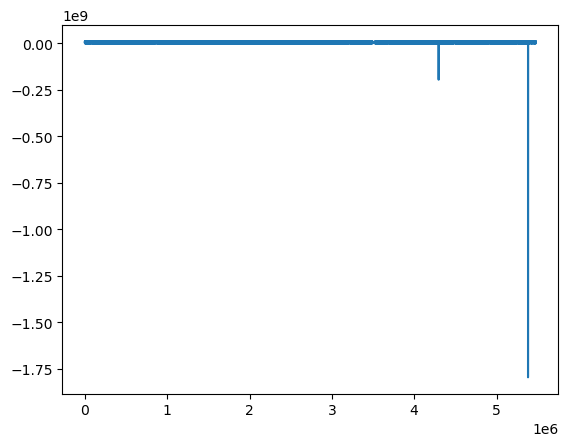

In [74]:
df_moscow2['price'].plot()

In [75]:
df_moscow2 = df_moscow2[df_moscow2['price'] > df_moscow2['price'].quantile(q=0.01)]

<AxesSubplot:>

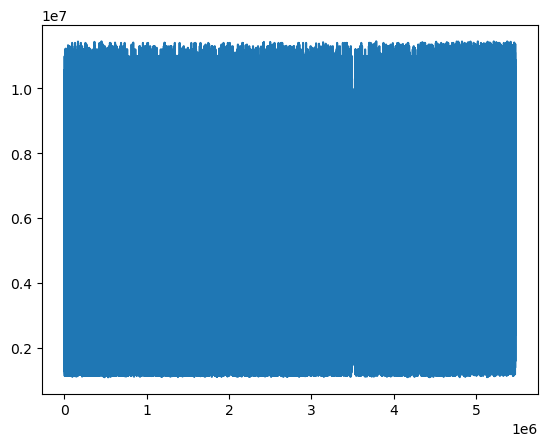

In [76]:
df_moscow2['price'].plot()

In [79]:
df_moscow2.columns

Index(['price', 'date', 'geo_lat', 'geo_lon', 'building_type', 'level',
       'levels', 'rooms', 'area'],
      dtype='object')

In [94]:
x = df_moscow2[['date', 'geo_lat', 'geo_lon', 'building_type', 'level', 'levels', 'rooms', 'area']]
y = df_moscow2['price']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import *

In [90]:
df_moscow2

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area
1,8650000,2018-02-27,55.683807,37.297405,3,5,24,2,69.1
4,5450000,2018-03-01,55.918767,37.984642,3,13,14,2,60.0
5,3300000,2018-03-02,55.908253,37.726448,1,4,5,1,32.0
9,2800000,2018-03-06,55.736972,38.846457,1,9,10,2,55.0
10,6909880,2018-03-06,55.913950,37.707712,1,9,14,3,76.1
...,...,...,...,...,...,...,...,...,...
5476893,6350000,2021-05-01,55.816520,37.342661,2,11,32,0,24.0
5476953,10650000,2021-05-01,55.668320,37.858000,2,3,17,2,80.0
5476962,4339000,2021-05-01,55.700399,37.960624,2,8,17,0,25.0
5476977,7293900,2021-05-01,55.927587,37.728987,2,12,17,3,59.0


In [98]:
num_features_x = ['date', 'geo_lat', 'geo_lon', 'building_type', 'level', 'levels', 'rooms', 'area']

In [96]:
x_stand = x
y_stand = y

In [100]:
x_stand[num_features_x] = (x_stand[num_features_x] - x_stand[num_features_x].mean()) / x_stand[num_features_x].std()

In [105]:
y_stand = (y_stand - y_stand.mean()) / y_stand.std()

In [106]:
x_stand = pd.get_dummies(x_stand)
x_stand

,date,geo_lat,building_type,level,levels,rooms,area
1,0.872847,1.223285,-0.137968,-0.891639,-0.360639,1.529835,0.284527
4,0.438550,1.223285,0.605838,0.375713,1.044511,0.169569,0.284527
5,-0.897746,-1.053378,0.572554,-0.100430,-0.536283,-1.054670,-0.900611
9,0.199926,-1.053378,0.030334,1.965007,0.341936,-0.374537,0.284527
10,1.206921,-1.053378,0.590588,-0.134982,0.341936,0.169569,1.469666
...,...,...,...,...,...,...,...
5476893,-1.279545,0.084954,0.282157,-0.808181,0.693223,2.618048,-2.085750
5476953,1.393048,0.084954,-0.186995,0.142168,-0.711927,0.577649,0.284527
5476962,-1.231820,0.084954,-0.085444,0.331420,0.166292,0.577649,-2.085750
5476977,0.390825,0.084954,0.633759,-0.095748,0.868867,0.577649,1.469666


In [107]:
X_train, X_test, y_train, y_test = train_test_split(x_stand, y_stand, test_size=0.3, random_state=0)

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [110]:
model = Sequential()
model.add(Dense(500, input_shape=(7,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [117]:
model.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=100, batch_size=256)

Epoch 1/100
1062/1062 [==============================] - 10s 9ms/step - loss: 0.2194 - mae: 0.3398 - val_loss: 0.2257 - val_mae: 0.3478
Epoch 2/100
1062/1062 [==============================] - 10s 10ms/step - loss: 0.2163 - mae: 0.3374 - val_loss: 0.2133 - val_mae: 0.3349
Epoch 3/100
1062/1062 [==============================] - 10s 10ms/step - loss: 0.2128 - mae: 0.3344 - val_loss: 0.2122 - val_mae: 0.3323
Epoch 4/100
1062/1062 [==============================] - 10s 9ms/step - loss: 0.2109 - mae: 0.3327 - val_loss: 0.2065 - val_mae: 0.3268
Epoch 5/100
1062/1062 [==============================] - 10s 9ms/step - loss: 0.2079 - mae: 0.3300 - val_loss: 0.2145 - val_mae: 0.3284
Epoch 6/100
1062/1062 [==============================] - 10s 9ms/step - loss: 0.2067 - mae: 0.3291 - val_loss: 0.2029 - val_mae: 0.3228
Epoch 7/100
1062/1062 [==============================] - 10s 9ms/step - loss: 0.2041 - mae: 0.3269 - val_loss: 0.2085 - val_mae: 0.3251
Epoch 8/100
1062/1062 [=======================

In [119]:
y_predict_MLP = model.predict(X_test)

4550/4550 [==============================] - 8s 2ms/step


In [122]:
y_predict_MLP, y_test

(array([[ 0.49699673],
        [-0.20148776],
        [ 1.0126563 ],
        ...,
        [ 1.0644696 ],
        [-1.0280449 ],
        [-1.5374197 ]], dtype=float32),
 4524300    0.982141
 2515877   -0.456031
 1575146    0.445874
 1894259   -0.884313
 372077     1.612889
              ...   
 4177160   -0.418892
 1073449    1.140393
 30656      0.128988
 3199962   -0.972797
 2722533   -1.655320
 Name: price, Length: 145575, dtype: float64)

In [121]:
metrics.r2_score(y_test, y_predict_MLP)

0.812316815157881